# Visualizations train data

This notebook preformes exploratory analyzes the energy price training set to identify patterns for later for feature engenering.



In [48]:
# We import the necessary libraries and modules
import sys
import os

project_root = os.path.abspath("..")
sys.path.append(project_root)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Get the data 
train_path = os.path.join(project_root, "data", "train.xlsx")
df = pd.read_excel(train_path)
hour_cols = [f'Hour {str(i).zfill(2)}' for i in range(1, 25)]
df_long = df.melt(id_vars=['PRICES'], value_vars=hour_cols, var_name='hour', value_name='price')
df_long['hour'] = df_long['hour'].str[-2:].astype(int)
df_long['PRICES'] = pd.to_datetime(df_long['PRICES'])
df_long.head(3)

,PRICES,hour,price
0,2007-01-01,1,24.31
1,2007-01-02,1,16.01
2,2007-01-03,1,28.00


In [64]:
# change data
daily_df = df_long.groupby('PRICES')['price'].mean().reset_index()
daily_df['day_of_month'] = daily_df['PRICES'].dt.day
daily_df['month'] = daily_df['PRICES'].dt.month
daily_df['day_of_week'] = daily_df['PRICES'].dt.dayofweek 
daily_df.head(3)

,PRICES,price,day_of_month,month,day_of_week
0,2007-01-01,17.004583,1,1,0
1,2007-01-02,32.877917,2,1,1
2,2007-01-03,40.385833,3,1,2


# Visualisations per time unit

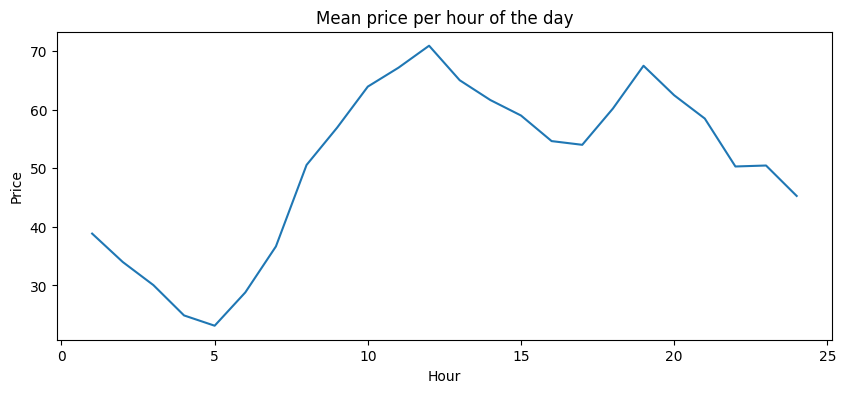

In [59]:
avg_hour_of_day = np.array([df_long.loc[df_long['hour'] == h, 'price'].mean() for h in range(0,25)])
plt.figure(figsize=(10,4))
sns.lineplot(x=np.arange(0,25), y=avg_hour_of_day)
plt.title('Mean price per hour of the day')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.show()


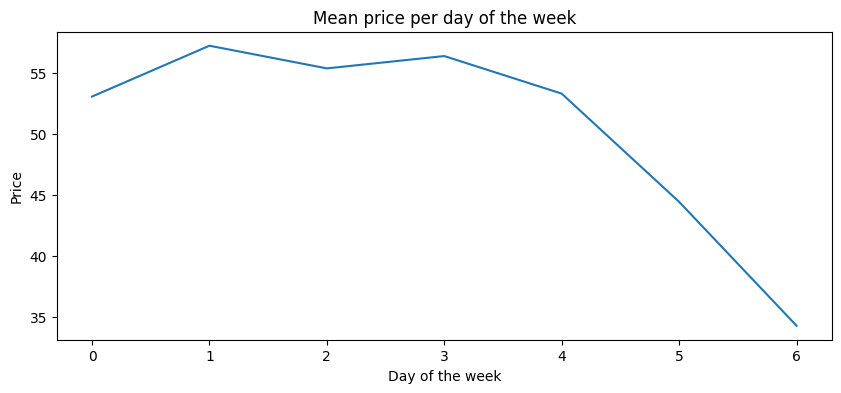

In [ ]:
avg_day_of_week = np.array([daily_df.loc[daily_df['day_of_week'] == d, 'price'].mean() for d in range(0,7)])
plt.figure(figsize=(10,4))
sns.lineplot(x=np.arange(0,7), y=avg_day_of_week)
plt.title('Mean price per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Price')
plt.show()


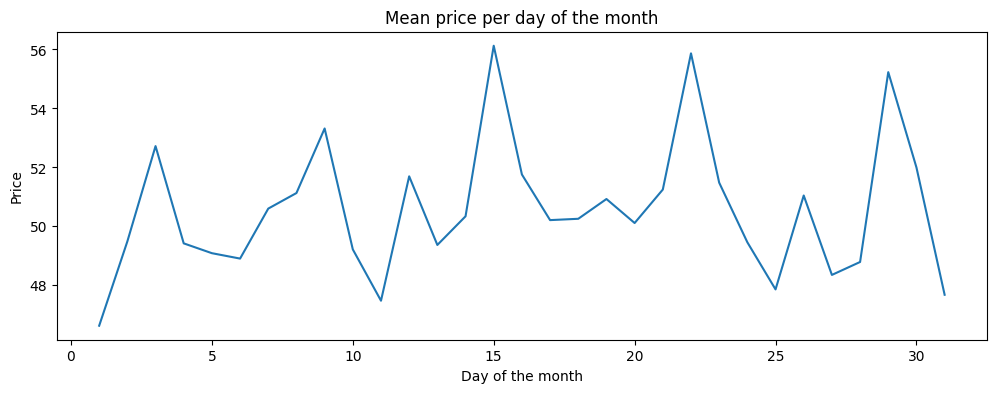

In [54]:
avg_day_of_month = np.array([daily_df.loc[daily_df['day_of_month'] == d, 'price'].mean() for d in range(1,32)])
plt.figure(figsize=(12,4))
sns.lineplot(x=np.arange(1,32), y=avg_day_of_month)
plt.title('Mean price per day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Price')
plt.show()


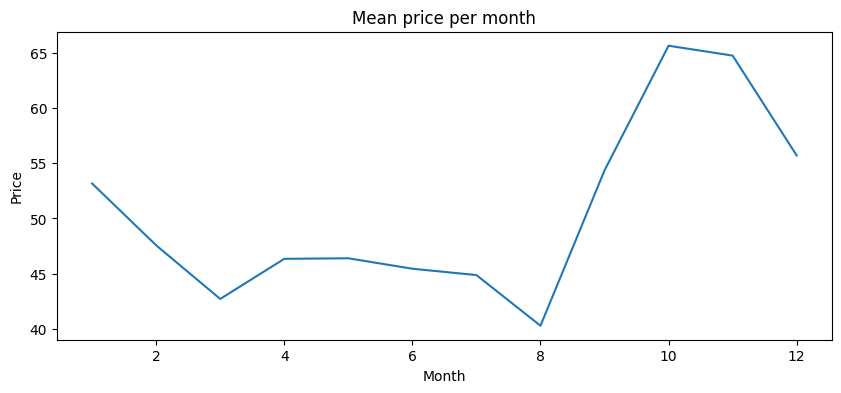

In [32]:
avg_month = np.array([daily_df.loc[daily_df['month'] == m, 'price'].mean() for m in range(1,13)])

plt.figure(figsize=(10,4))
sns.lineplot(x=np.arange(1,13), y=avg_month)
plt.title('Mean price per month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [65]:
# mean price per year
daily_df['year'] = daily_df['PRICES'].dt.year
years = np.sort(daily_df['year'].unique())

avg_per_year = np.array([
    daily_df.loc[daily_df['year'] == y, 'price'].mean()
    for y in years
])

avg_per_year

array([41.77785845, 70.61432263, 39.36063242])

# Other visualisations

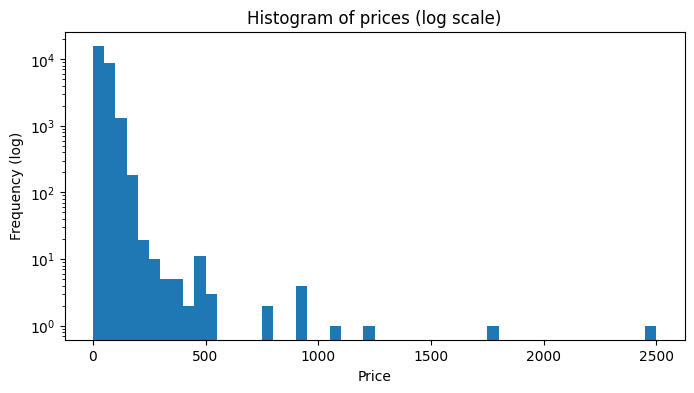

In [35]:
plt.figure(figsize=(8,4))
plt.hist(df_long['price'], bins=50)
plt.yscale('log')
plt.title('Histogram of prices (log scale)')
plt.xlabel('Price')
plt.ylabel('Frequency (log)')
plt.show()


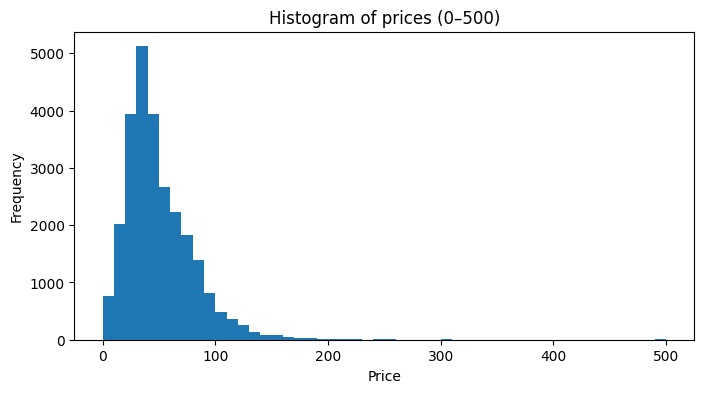

In [67]:
plt.figure(figsize=(8,4))
plt.hist(df_long['price'], bins=50, range=(0, 500))
plt.title('Histogram of prices (0–500)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


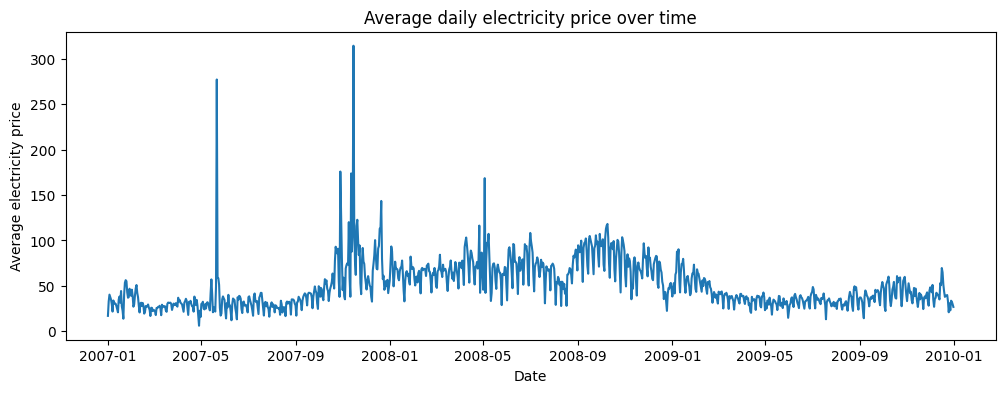

In [37]:
plt.figure(figsize=(12,4))
plt.plot(daily_df['PRICES'], daily_df['price'])
plt.xlabel("Date")
plt.ylabel("Average electricity price")
plt.title("Average daily electricity price over time")
plt.show()

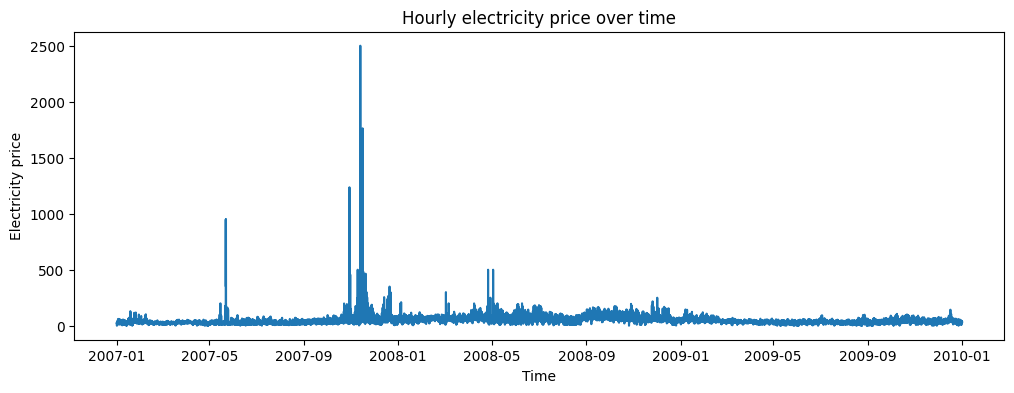

In [ ]:
df_long['datetime'] = df_long['PRICES'] + pd.to_timedelta(df_long['hour'] - 1, unit='h')
df_long = df_long.sort_values('datetime')
plt.figure(figsize=(12,4))
plt.plot(df_long['datetime'], df_long['price'])
plt.xlabel("Time")
plt.ylabel("Electricity price")
plt.title("Hourly electricity price over time")
plt.show()
